In [163]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
import re
import string
import random
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics.pairwise import cosine_similarity
from matplotlib import pyplot

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [63]:
# Reading the file
df = pd.read_csv("drive/MyDrive/goodread.csv")
df.head()

,Desc,Author,Genre,Img_url,Rating,Title
0,John Berger’s Classic Text on ArtJohn Berger's...,John Berger,art,https://i.gr-assets.com/images/S/compressed.ph...,3.89,Ways of Seeing
1,"The Story of Art, one of the most famous and p...",E.H. Gombrich,art,https://i.gr-assets.com/images/S/compressed.ph...,3.95,The Story of Art
2,When Drawing on the Right Side of the Brain wa...,Betty Edwards,art,https://i.gr-assets.com/images/S/compressed.ph...,3.87,The New Drawing on the Right Side of the Brain
3,"You don’t need to be a genius, you just need t...",Austin Kleon,art,https://i.gr-assets.com/images/S/compressed.ph...,3.94,Steal Like an Artist: 10 Things Nobody Told Yo...
4,"Banksy, Britain's now-legendary ""guerilla"" str...",Banksy,art,https://i.gr-assets.com/images/S/compressed.ph...,3.85,Wall and Piece


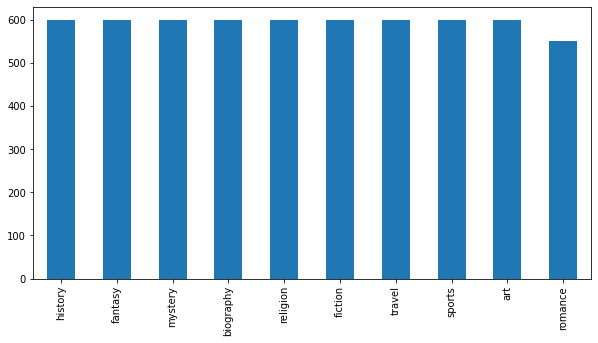

In [64]:
# Genre distribution
df['Genre'].value_counts().plot(x = 'Genre', y ='count', kind = 'bar', figsize = (10,5)  )

In [65]:
df[df['Desc']=='None'].index

Int64Index([   6,   36,   44,   45,   59,   62,   94,  105,  106,  107,
            ...
            5883, 5884, 5889, 5897, 5899, 5901, 5927, 5933, 5937, 5946],
           dtype='int64', length=672)

In [66]:
df.drop(df[df['Desc']=='None'].index, inplace=True)

In [67]:
df = df.reset_index(drop=True)

In [68]:
df

,Desc,Author,Genre,Img_url,Rating,Title
0,John Berger’s Classic Text on ArtJohn Berger's...,John Berger,art,https://i.gr-assets.com/images/S/compressed.ph...,3.89,Ways of Seeing
1,"The Story of Art, one of the most famous and p...",E.H. Gombrich,art,https://i.gr-assets.com/images/S/compressed.ph...,3.95,The Story of Art
2,When Drawing on the Right Side of the Brain wa...,Betty Edwards,art,https://i.gr-assets.com/images/S/compressed.ph...,3.87,The New Drawing on the Right Side of the Brain
3,"You don’t need to be a genius, you just need t...",Austin Kleon,art,https://i.gr-assets.com/images/S/compressed.ph...,3.94,Steal Like an Artist: 10 Things Nobody Told Yo...
4,"Banksy, Britain's now-legendary ""guerilla"" str...",Banksy,art,https://i.gr-assets.com/images/S/compressed.ph...,3.85,Wall and Piece
...,...,...,...,...,...,...
5273,NOW A MAJOR MOTION PICTURERobyn Davidson&aposs...,Robyn Davidson,travel,https://i.gr-assets.com/images/S/compressed.ph...,3.92,Tracks: A Woman's Solo Trek Across 1700 Miles ...
5274,"When Eric Newby, fashion industry worker and i...",Eric Newby,travel,https://i.gr-assets.com/images/S/compressed.ph...,3.98,A Short Walk in the Hindu Kush
5275,"In her twenties, journalist Sarah Macdonald ba...",Sarah Macdonald,travel,https://i.gr-assets.com/images/S/compressed.ph...,3.54,Holy Cow: An Indian Adventure
5276,"Three friends, each on the brink of a quarter-...",Jennifer Baggett,travel,https://i.gr-assets.com/images/S/compressed.ph...,3.73,The Lost Girls: Three Friends. Four Continents...


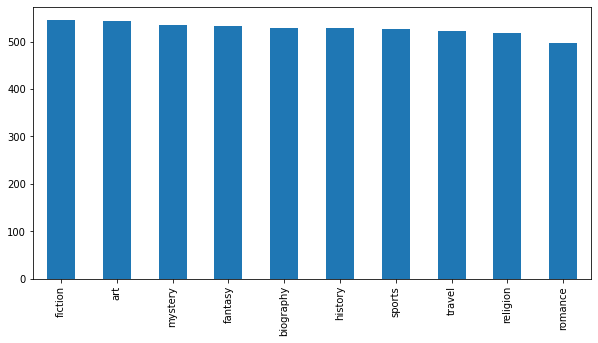

In [69]:
# Genre distribution
df['Genre'].value_counts().plot(x = 'Genre', y ='count', kind = 'bar', figsize = (10,5)  )

In [70]:
# Printing the book title and description randomly
df['Title'] [2464]
df['Desc'][2464]

"On a May afternoon in 1943, an Army Air Forces bomber crashed into the Pacific Ocean and disappeared, leaving only a spray of debris and a slick of oil, gasoline, and blood. Then, on the ocean surface, a face appeared. It was that of a young lieutenant, the plane's bombardier, who was struggling to a life raft and pulling himself aboard. So began one of the most extraordinOn a May afternoon in 1943, an Army Air Forces bomber crashed into the Pacific Ocean and disappeared, leaving only a spray of debris and a slick of oil, gasoline, and blood. Then, on the ocean surface, a face appeared. It was that of a young lieutenant, the plane's bombardier, who was struggling to a life raft and pulling himself aboard. So began one of the most extraordinary odysseys of the Second World War.The lieutenant’s name was Louis Zamperini. In boyhood, he'd been a cunning and incorrigible delinquent, breaking into houses, brawling, and fleeing his home to ride the rails. As a teenager, he had channeled his 

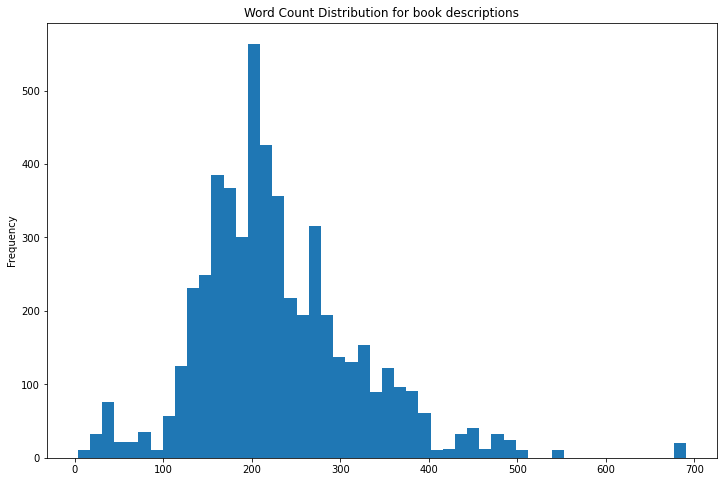

In [71]:
df['word_count'] = df['Desc'].apply(lambda x: len(str(x).split()))# Plotting the word count
df['word_count'].plot(
    kind='hist',
    bins = 50,
    figsize = (12,8),title='Word Count Distribution for book descriptions')

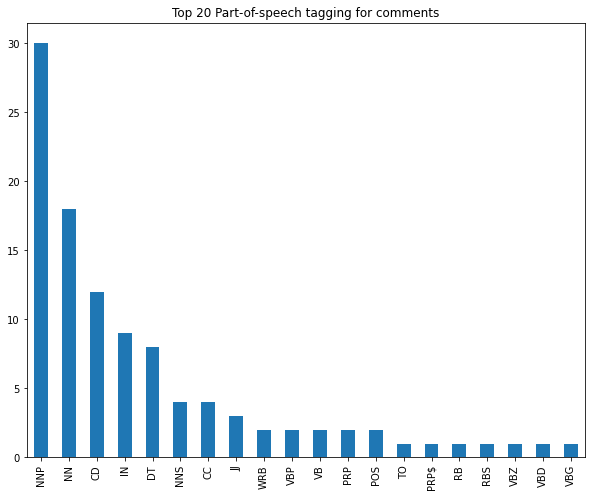

In [72]:
from textblob import TextBlob
blob = TextBlob(str(df['Desc']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()[:20]
pos_df.plot(kind = 'bar', figsize=(10, 8), title = "Top 20 Part-of-speech tagging for comments")

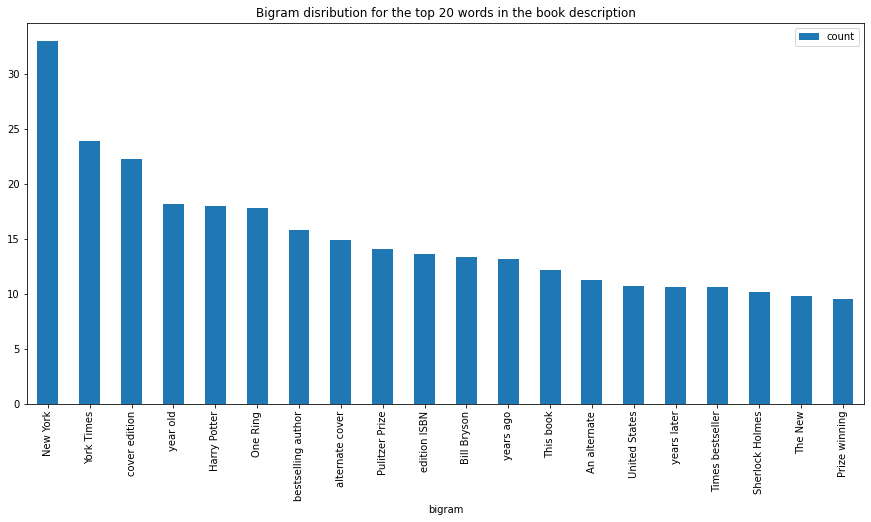

In [185]:
#Converting text descriptions into vectors using TF-IDF using Bigram
tf = TfidfVectorizer(ngram_range=(2, 2), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(df['Desc'])
total_words = tfidf_matrix.sum(axis=0) 
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
#converting into dataframe 
bigram = pd.DataFrame(freq)
bigram.rename(columns = {0:'bigram', 1: 'count'}, inplace = True) 
#Taking first 20 records
bigram = bigram.head(20)

#Plotting the bigram distribution
bigram.plot(x ='bigram', y='count', kind = 'bar', title = "Bigram disribution for the top 20 words in the book description", figsize = (15,7), )

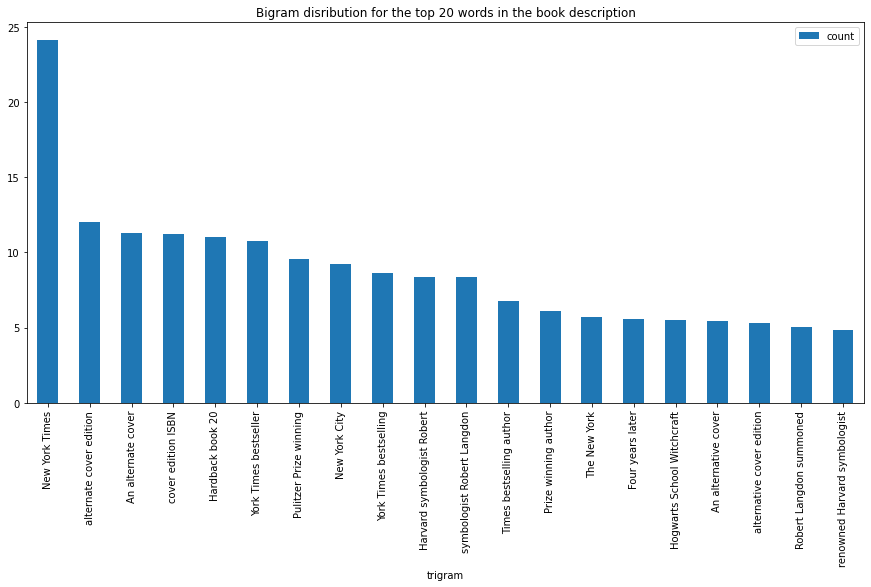

In [186]:
#Converting text descriptions into vectors using TF-IDF using Trigram
tf = TfidfVectorizer(ngram_range=(3, 3), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(df['Desc'])
total_words = tfidf_matrix.sum(axis=0) 
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)#converting into dataframe 
trigram = pd.DataFrame(freq)
trigram.rename(columns = {0:'trigram', 1: 'count'}, inplace = True) 
#Taking first 20 records
trigram = trigram.head(20)

#Plotting the trigramn distribution
trigram.plot(x ='trigram', y='count', kind = 'bar', title = "Bigram disribution for the top 20 words in the book description", figsize = (15,7), )

In [187]:
# Function for removing NonAscii characters
def _removeNonAscii(s):
    return "".join(i for i in s if  ord(i)<128)

# Function for converting into lower case
def make_lower_case(text):
    return text.lower()

# Function for removing stop words
def remove_stop_words(text):
    text = text.split()
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    return text

# Function for removing punctuation
def remove_punctuation(text):
    tokenizer = RegexpTokenizer(r'\w+')
    text = tokenizer.tokenize(text)
    text = " ".join(text)
    return text

# Function for removing the html tags
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

# Applying all the functions in description and storing as a cleaned_desc
df['cleaned_desc'] = df['Desc'].apply(_removeNonAscii)
df['cleaned_desc'] = df.cleaned_desc.apply(func = make_lower_case)
df['cleaned_desc'] = df.cleaned_desc.apply(func = remove_stop_words)
df['cleaned_desc'] = df.cleaned_desc.apply(func=remove_punctuation)
df['cleaned_desc'] = df.cleaned_desc.apply(func=remove_html)

In [188]:
df['cleaned_desc']

0       john bergers classic text artjohn berger s way...
1       story art one famous popular books art ever wr...
2       drawing right side brain first published 1979 ...
3       dont need genius need yourself thats message a...
4       banksy britain s now legendary guerilla street...
                              ...                        
5273    nowa major motion picturerobyn davidson aposs ...
5274    eric newby fashion industry worker inexperienc...
5275    twenties journalist sarah macdonald backpacked...
5276    three friends brink quarter life crisis make p...
5277    robert macfarlane travels britain aposs ancien...
Name: cleaned_desc, Length: 5278, dtype: object

In [189]:
data = df.loc[df['Genre'] == genre]  
data.reset_index(level = 0, inplace = True)

In [198]:
# Function for recommending books based on Book title. It takes book title and genre as an input.
def recommend(title, genre):
    # Matching the genre with the dataset and reset the index
    data = df.loc[df['Genre'] == genre]  
    data.reset_index(level = 0, inplace = True) 
  
    # Convert the index into series
    indices = pd.Series(data.index, index = data['Title'])
    
    #Converting the book title into vectors and used bigram
    tf = TfidfVectorizer(analyzer='word', ngram_range=(2, 2), min_df = 1, stop_words='english')
    tfidf_matrix = tf.fit_transform(data['Title'])
    
    # Calculating the similarity measures based on Cosine Similarity
    sg = cosine_similarity(tfidf_matrix, tfidf_matrix)
    
    # Get the index corresponding to original_title
       
    idx = indices[title]# Get the pairwsie similarity scores 
    sig = list(enumerate(sg[idx]))# Sort the books
    sig = sorted(sig, reverse=True)# Scores of the 5 most similar books 
    sig = sig[1:6]# Book indicies
    movie_indices = [i[0] for i in sig]
   
    # Top 5 book recommendation
    rec = data[['Title', 'Img_url']].iloc[movie_indices]
       
    # It reads the top 5 recommended book urls and print the images
    
    for i in rec['Img_url']:
        response = requests.get(i)
        img = Image.open(BytesIO(response.content))
        plt.figure()
        # print(plt.imshow(img))
        plt.imshow(img)

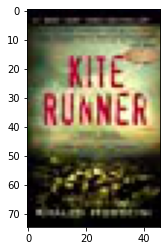

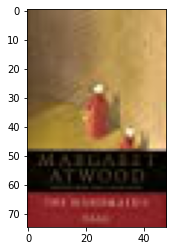

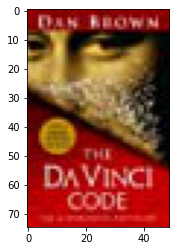

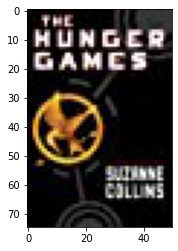

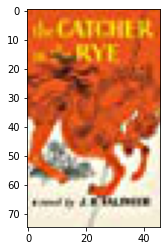

In [199]:
recommend("The Book Thief", "fiction")